In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set_style("whitegrid");
from sklearn.preprocessing import Normalizer
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
import plotly.graph_objects as go

# import warnings
# warnings.filterwarnings('ignore')

In [444]:
df = pd.read_csv('data.csv')

# Objective

```Employing statistical techniques, conduct a preliminary prognosis of Hypertension/hypotension, based on the level of hemoglobin and genetic history of the individual.```

# 1. Descriptive Analysis

In [445]:
# I'll only take data required for this ojbective

df = df[['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]

In [446]:
# let's check if this data requires any pre-processing/ cleaning
df.describe()
# description looks fine, may need to normalise Level_of_Hemoglobin

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
count,2000.000000,2000.000000,1908.000000
mean,0.493500,11.710035,0.494817
std,0.500083,2.186701,0.291736
min,0.000000,8.100000,0.000000
25%,0.000000,10.147500,0.240000
50%,0.000000,11.330000,0.490000
75%,1.000000,12.945000,0.740000
max,1.000000,17.560000,1.000000


In [447]:
print("Abnormal blood pressure cases: ", len(df[df.Blood_Pressure_Abnormality == 1]))
print("Normal blood pressure cases: ", len(df[df.Blood_Pressure_Abnormality == 0]))

print('\x1b[31mDataset is not highly imbalanced \x1b[0m')

Abnormal blood pressure cases:  987
Normal blood pressure cases:  1013
Dataset is not highly imbalanced 


In [448]:
df.isna().sum()/ df.shape[0]

# 4.6 % data in Genetic_Pedigree_Coefficient is missing

Blood_Pressure_Abnormality      0.000
Level_of_Hemoglobin             0.000
Genetic_Pedigree_Coefficient    0.046
dtype: float64

# 2. Visual/ Inferential Analysis

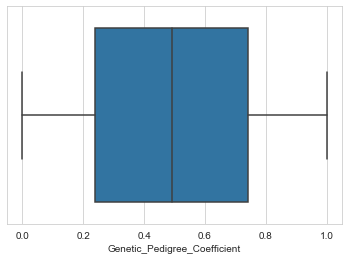

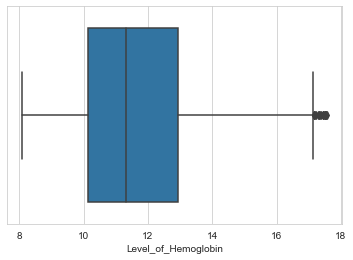

In [449]:
# check and removal for any extreme outlier
sns.boxplot(x=df['Genetic_Pedigree_Coefficient'])
plt.show()
sns.boxplot(x=df['Level_of_Hemoglobin'])
plt.show()

In [450]:
# I see outliers in Level_of_Hemoglobin
# removing using IQR
Q1 = df.Level_of_Hemoglobin.quantile(0.25)
Q3 = df.Level_of_Hemoglobin.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df.Level_of_Hemoglobin < (Q1 - 1.5 * IQR)) | (df.Level_of_Hemoglobin > (Q3 + 1.5 * IQR)))]

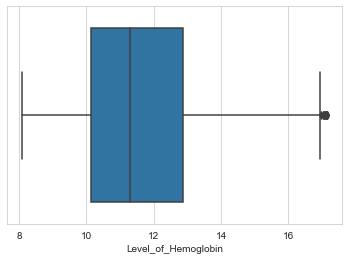

In [451]:
sns.boxplot(x=df['Level_of_Hemoglobin'])
plt.show()

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



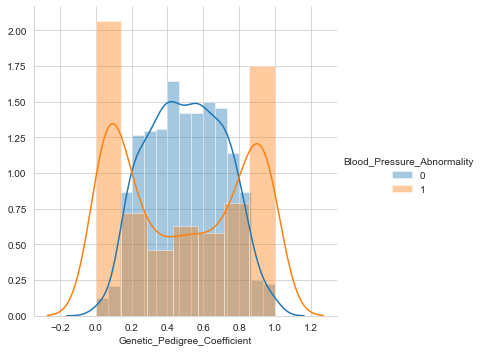

In [452]:
# let us check the distribution of Genetic_Pedigree_Coefficient with respect to Blood_Pressure_Abnormality

sns.FacetGrid(df, hue="Blood_Pressure_Abnormality", size=5) \
   .map(sns.distplot, "Genetic_Pedigree_Coefficient") \
   .add_legend();
plt.show();

```it's clear, for normal blood pressure Genetic_Pedigree_Coefficient follows roughly normal distribution. But, not with abnormal blood pressure. So, I'll replace NaN values with Mean in case of Normal BP and with Mode in case of Abnormal BP```

## Filling missing values tactically


In [453]:
missing_mask = df.Genetic_Pedigree_Coefficient.isna()
mapping_dict = dict({0: df.Genetic_Pedigree_Coefficient.mean(), 1: df.Genetic_Pedigree_Coefficient.mode()})
df.loc[missing_mask, 'Genetic_Pedigree_Coefficient'] = df.loc[missing_mask, 'Blood_Pressure_Abnormality'].map(mapping_dict)

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



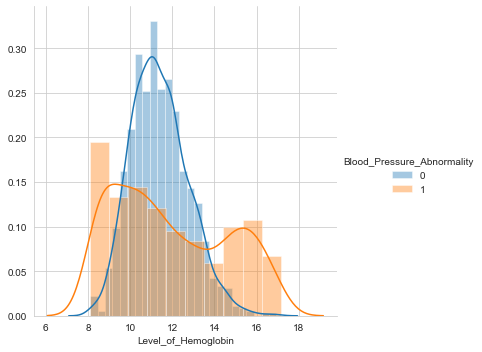

In [454]:
# let us check the distribution of Genetic_Pedigree_Coefficient with respect to Blood_Pressure_Abnormality

sns.FacetGrid(df, hue="Blood_Pressure_Abnormality", size=5) \
   .map(sns.distplot, "Level_of_Hemoglobin") \
   .add_legend();
plt.show();

```it's clear, for normal blood pressure Level_of_Hemoglobin follows roughly normal distribution. But, not with abnormal blood pressure.```

In [490]:
# check if there is any correlation between Genetic_Pedigree_Coefficient & Blood_Pressure_Abnormality
df.Blood_Pressure_Abnormality.corr(df.Genetic_Pedigree_Coefficient)

#No correlation

-0.010399563039479297

In [456]:
import plotly.express as px
fig = px.scatter(df, x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="Blood_Pressure_Abnormality")

fig.show()

# 3. Feature Engineering

```From above 2 distribution plots and this visualisation I can say even linear regression can work with feature engineering, I'll use feature $Genetic Pedigree Coefficient^2$ + $Level of Hemoglobin^2$ with the output and check results

In [457]:
import plotly.express as px
fig = px.scatter(df, x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="Blood_Pressure_Abnormality")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

In [458]:
# adding new features in it

df['Level_of_Hemoglobin_2'] = df['Level_of_Hemoglobin']**2
df['Genetic_Pedigree_Coefficient_2'] = df['Genetic_Pedigree_Coefficient']**2

df = df.astype('float64')

In [459]:
train, test = train_test_split(df)

In [460]:
Y_train = train[['Blood_Pressure_Abnormality']]
X_train = train[['Level_of_Hemoglobin_2', 'Genetic_Pedigree_Coefficient_2', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]
Y_test = test[['Blood_Pressure_Abnormality']]
X_test = test[['Level_of_Hemoglobin_2', 'Genetic_Pedigree_Coefficient_2', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]

# 4. Using Different Classification Algorithms

## 4.1 Logistic Regression

In [461]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [462]:
clf.score(X_test, Y_test)

0.8464646464646465

In [463]:
Y_pred = clf.predict(X_test)

In [465]:


import plotly.express as px
t = X_test.copy()
t['z'] = clf.predict_proba(X_test)[:,1]
t['pred'] = clf.predict(X_test)
t['truth'] = Y_test.values
fig = px.scatter_3d(t, x='Genetic_Pedigree_Coefficient', y='Level_of_Hemoglobin', z='z',
              color='z')
fig.show()

In [469]:
cf_mat = confusion_matrix(Y_pred, Y_test)
cf_mat = cf_mat.T
print("Abnormal", "Normal")
print(cf_mat)

Abnormal Normal
[[238  22]
 [ 54 181]]


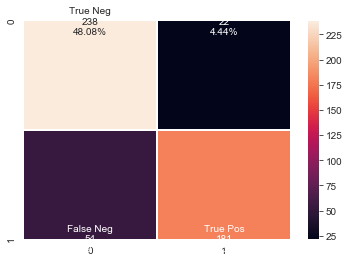

In [470]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mat.flatten()/np.sum(cf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_mat, annot=labels, fmt='',linewidths=.5)
plt.show()

<span style="color:red">According to buisness problem we need to reduce False Negatives in this case! We don't want to classify a person normal even if s/he's abnormal</span>

In [471]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.86       292
         1.0       0.77      0.89      0.83       203

    accuracy                           0.85       495
   macro avg       0.84      0.85      0.84       495
weighted avg       0.86      0.85      0.85       495



In [472]:
roc_auc_score(Y_pred, Y_test)

0.8533470544571158

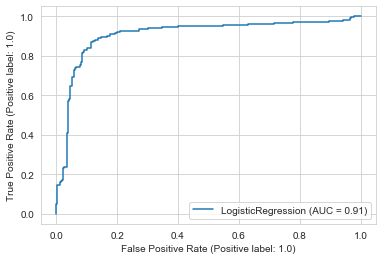

In [473]:
plot_roc_curve(clf, X_test, Y_test)
plt.show()

In [474]:
X_test['truth'] = Y_test.values
X_test['pred'] = Y_pred
X_test['errors'] = Y_test.values.flatten() == Y_pred
import plotly.express as px
fig = px.scatter(X_test, x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

<span style="color:red">This circle should be small in order to reduce false negatives</span>

In [475]:
# wrong predictions

X_test['truth'] = Y_test.values
X_test['pred'] = Y_pred
X_test['errors'] = Y_test.values.flatten() == Y_pred
import plotly.express as px
fig = px.scatter(X_test[X_test.truth == 1], x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

In [476]:
# wrong predictions

X_test['truth'] = Y_test.values
X_test['pred'] = Y_pred
X_test['errors'] = Y_test.values.flatten() == Y_pred
import plotly.express as px
fig = px.scatter(X_test[X_test.truth == 0], x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

In [477]:
X_test = X_test.iloc[:, :4]

## 4.2 Do we need more complex boundary ?

``` Yes there are chances of increase in accuracy, but explainability will reduce. Best technique will be ensemble model, XGBoost to rescue```

In [478]:
import xgboost as xgb

In [479]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [480]:
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.5,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training binary:logistic
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [481]:
bst = xgb.train(param, dtrain, num_round)

[18:01:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:01:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [482]:
bst.dump_model('dump.raw.txt')

In [483]:
preds = bst.predict(dtest)

In [484]:
Y_pred_xg = np.asarray([np.argmax(line) for line in preds])


In [485]:
import plotly.express as px
t = X_test.copy()
t['z'] = preds[:,1]
t['pred'] = Y_pred_xg
t['truth'] = Y_test.values
fig = px.scatter_3d(t, x='Genetic_Pedigree_Coefficient', y='Level_of_Hemoglobin', z='z',
              color='z')
fig.show()

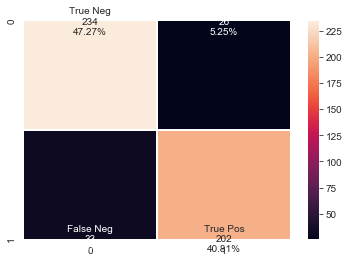

In [486]:
cf_mat = confusion_matrix(Y_pred_xg, Y_test).T

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mat.flatten()/np.sum(cf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_mat, annot=labels, fmt='',linewidths=.5)
plt.show()

<span style="color:red">False negatives has been reduced to 21% from 39%</span>

In [487]:
t = X_test.copy()
t['truth'] = Y_test.values
t['pred'] = Y_pred_xg
t['errors'] = Y_test.values.flatten() == Y_pred_xg
import plotly.express as px
fig = px.scatter(t[t.truth == 1], x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)

fig.show()

<span style="color:red">False negatives has been reduced to 24% from 45%</span>

In [488]:
t = X_test.copy()
t['truth'] = Y_test.values
t['pred'] = Y_pred_xg
t['errors'] = Y_test.values.flatten() == Y_pred_xg
import plotly.express as px
fig = px.scatter(t[t.truth == 0], x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)

fig.show()

In [359]:
# saving best model

bst.save_model('model_bp.model')

## 4.3 Do we need more complex boundary ?
``` No, This will overfit the model!, Now we can try other variables in the data```

# 5. What would be my approach, if there were other variables also in the data?

```I'll:
1. Select the features using domain knowledge.
2. Pre-process them, normalise if required.
3. Convert categorical features into onehot encoding.
4. Find correlation and leave unescassary features.
5. Perform EDA.
6. Perform Feature Engineering.
7. Data Modelling
8. Validation
9. Pushing in production.```

In [492]:
df = pd.read_csv('data.csv')

In [493]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,0
